# Lookyloo Workshop

This workshop introduces Lookyloo, a web interface for capturing and analyzing website behavior, network connections, and potential security threats through automated web page analysis.

## What is Lookyloo?

Lookyloo is a web interface that allows users to capture a website page and then display a tree of domains that call each other. It provides comprehensive analysis of web page behavior, including network connections, redirects, resources loaded, and potential security indicators. Lookyloo is particularly useful for analyzing suspicious URLs, phishing sites, and malicious web infrastructure.

https://lookyloo.circl.lu/capture

## Key Features

### Lookyloo Capabilities:
- **Website Capture**: Automated browser-based capture of web pages with full rendering
- **Network Analysis**: Complete mapping of network connections and resource loading
- **Domain Tree Visualization**: Hierarchical view of all domains contacted during page load
- **Screenshot Generation**: Visual evidence of how websites appear to users
- **Redirect Tracking**: Complete chain of HTTP redirects and URL changes
- **IP Address Intelligence**: Correlation of domains to IP addresses and hosting infrastructure
- **Historical Correlation**: Cross-reference captures to identify related infrastructure
- **Security Analysis**: Detection of suspicious behavior and potential threats

## Documentation

- **Main Service**: https://www.lookyloo.eu/docs/main/index.html
- **API Documentation**: https://lookyloo.circl.lu/doc/
- **Python library**: https://pylookyloo.readthedocs.io/en/latest/api_reference.html

### Use Cases:
- **Phishing Analysis**: Analyze suspicious URLs and phishing campaigns
- **Malware Infrastructure**: Map command and control server networks
- **Brand Protection**: Monitor unauthorized use of corporate branding
- **Incident Response**: Investigate suspicious web activity during security incidents
- **Threat Hunting**: Proactively search for malicious web infrastructure
- **Security Research**: Study web-based attack techniques and infrastructure patterns

## Learning Objectives

By completing this workshop, you will learn to:
- Submit URLs for automated analysis and capture
- Retrieve and interpret website screenshots for visual analysis
- Extract network infrastructure data including hostnames and IP addresses
- Track URL redirects and analyze redirection chains
- Correlate infrastructure across multiple captures and campaigns
- Build automated workflows for suspicious URL analysis
- Generate actionable intelligence from web-based threat infrastructure

## Exercises

In [ ]:
from pylookyloo import Lookyloo

# Configure HTTP sessions for API communication
print("Configuring API client for Lookyloo...")

# Lookyloo session configuration
lookyloo = Lookyloo()

print("API client configured successfully!")
print("Ready to query Lookyloo service.")

Configuring API client for Lookyloo...
API client configured successfully!
Ready to query Lookyloo service.


### Exercise 1.0: Submit a URL for Analysis

**Objective:** Learn how to submit suspicious URLs to Lookyloo for comprehensive automated analysis and security assessment.

**Understanding URL Submission:**
This exercise demonstrates the process of submitting a URL to Lookyloo for analysis. The service will:
- **Browser Simulation**: Load the URL in a real browser environment
- **Network Monitoring**: Track all network connections and resource requests
- **Screenshot Capture**: Generate visual evidence of the website appearance
- **Data Collection**: Gather comprehensive metadata about the site behavior

**Why Analyze URLs:**
- **Phishing Detection**: Identify fraudulent websites impersonating legitimate services
- **Malware Distribution**: Detect sites hosting malicious downloads or exploit kits
- **Infrastructure Mapping**: Understand the network infrastructure behind suspicious sites
- **Campaign Tracking**: Link related malicious URLs to broader threat campaigns

**API Endpoint:** `https://lookyloo.circl.lu/submit`

In [69]:
import time

try:
    url = "http://bilnet-lu-config.com"
    print(f"Enqueuing URL for analysis: {url}")
    capture_uuid = lookyloo.submit(quiet=True, url=url)
    print(f"URL enqueued successfully. Capture URL: https://lookyloo.circl.lu/tree/{capture_uuid}")

    capture_info = lookyloo.get_info(capture_uuid)

    retries = 0
    while 'error' in capture_info and capture_info['error'].startswith('Unable to find UUID'):
        if retries >= 10:
            print("Maximum retries reached. Please check back later.")
            break
        print("Capture is still being processed. Checking back in 10 seconds...")
        retries += 1
        time.sleep(10)
        capture_info = lookyloo.get_info(capture_uuid)

    print("Capture Info:")
    for key, value in capture_info.items():
        print(f"  {key}: {value}")

except Exception as e:
    print(f"An error occurred while enqueuing the URL: {e}")
    capture_url = None

Enqueuing URL for analysis: http://bilnet-lu-config.com
URL enqueued successfully. Capture URL: https://lookyloo.circl.lu/tree/1fbbb1a2-f893-4ec6-b3a0-bd23e1c744d3
Capture is still being processed. Checking back in 10 seconds...
Capture is still being processed. Checking back in 10 seconds...
Capture is still being processed. Checking back in 10 seconds...
Capture is still being processed. Checking back in 10 seconds...
Capture is still being processed. Checking back in 10 seconds...
Capture is still being processed. Checking back in 10 seconds...
Capture is still being processed. Checking back in 10 seconds...
Capture Info:
  capture_time: 2025-11-11T10:42:41.406000+00:00
  referer: 
  title: bilnet-lu-config.com
  url: http://bilnet-lu-config.com
  user_agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.7339.16 Safari/537.36
  uuid: 1fbbb1a2-f893-4ec6-b3a0-bd23e1c744d3


### Exercise 1.1: Get Screenshot of the Capture

**Objective:** Retrieve and display visual evidence of how the analyzed website appears to users for security assessment and documentation.

**Understanding Screenshot Analysis:**
Screenshots provide crucial visual intelligence for security analysis:
- **Visual Evidence**: Document exactly how malicious sites appear to victims
- **Brand Impersonation**: Identify phishing sites copying legitimate company designs
- **User Experience**: Understand how attackers design sites to deceive users
- **Content Analysis**: Analyze text, images, and layout for threat indicators

**Security Applications:**
- **Phishing Detection**: Compare with legitimate sites to identify impersonation attempts
- **Incident Documentation**: Preserve visual evidence for investigations and reports
- **Threat Intelligence**: Build visual databases of malicious site characteristics
- **User Training**: Show examples of malicious sites in security awareness programs

**API Endpoint:** `https://lookyloo.circl.lu/bin/[capture_uuid]/screenshot`

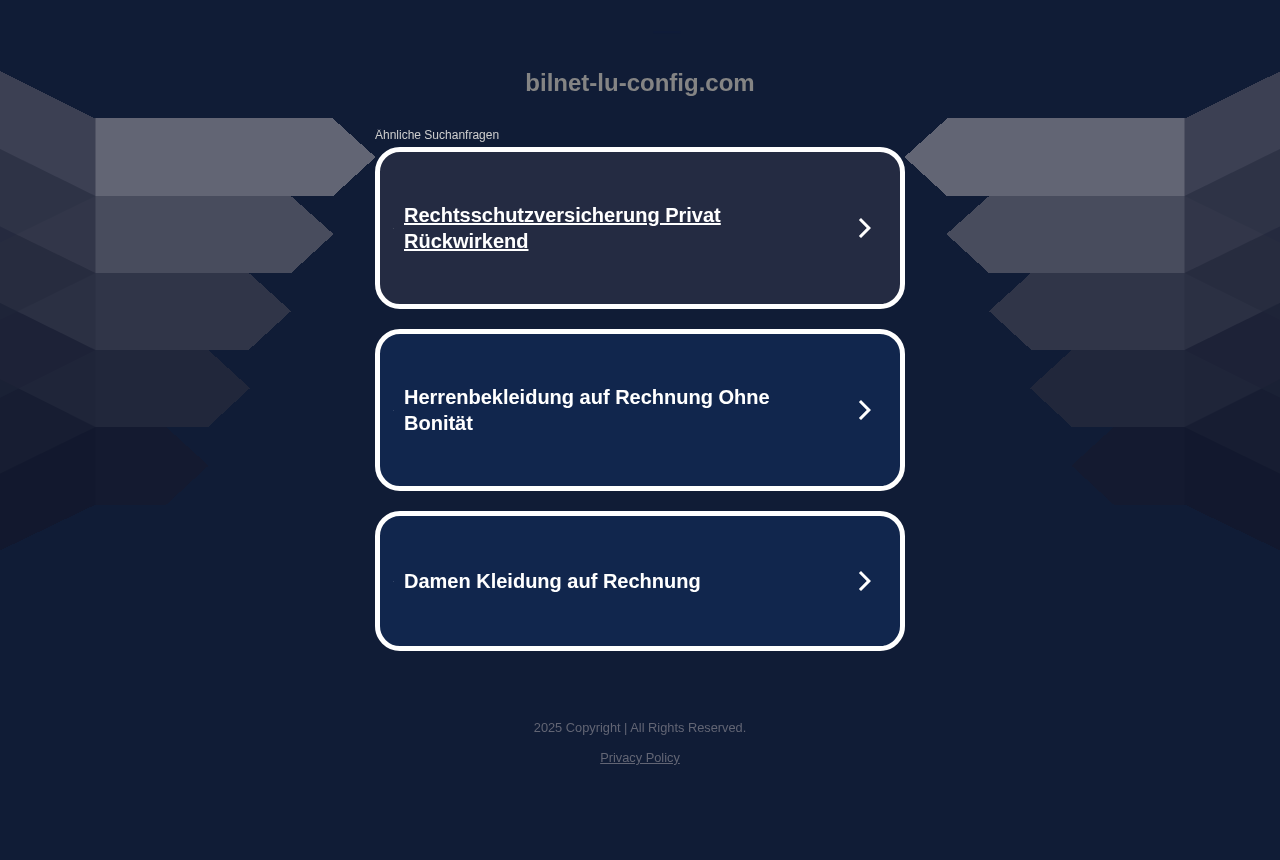

In [70]:
from PIL import Image
capture_screenshot = lookyloo.get_screenshot(capture_uuid)

image = Image.open(capture_screenshot)
display(image)

### Exercise 1.2: Get All Hostnames

**Objective:** Extract all domain names contacted during the website analysis to map the complete network infrastructure and identify suspicious connections.

**Understanding Hostname Analysis:**
Analyzing hostnames reveals the complete network infrastructure used by websites:
- **Third-Party Services**: Identify external services and integrations used by the site
- **Content Delivery Networks**: Map CDN usage and global infrastructure
- **Advertising Networks**: Track advertising and analytics service connections
- **Suspicious Domains**: Identify potentially malicious or suspicious domain connections

**Security Intelligence Applications:**
- **Infrastructure Mapping**: Build comprehensive maps of malicious infrastructure
- **Domain Reputation**: Assess the reputation of all connected domains
- **Campaign Correlation**: Link related malicious sites through shared infrastructure
- **Threat Hunting**: Search for known malicious domains in organizational logs

**API Endpoint:** `https://lookyloo.circl.lu/json/[capture_uuid]/hostnames`

In [71]:
response = lookyloo.get_hostnames(capture_uuid)

print("Hostnames associated with the capture:")
for host in response['response']['hostnames']:
    print(f" - {host}")

Hostnames associated with the capture:
 - partner.googleadservices.com
 - ep2.adtrafficquality.google
 - pagead2.googlesyndication.com
 - d38psrni17bvxu.cloudfront.net
 - syndicatedsearch.goog
 - afs.googleusercontent.com
 - ep1.adtrafficquality.google
 - euob.youstarsbuilding.com
 - bilnet-lu-config.com
 - obseu.youstarsbuilding.com
 - www.google.com


### Exercise 1.3: Get All IP Addresses

**Objective:** Extract IP addresses used by the website to understand hosting infrastructure and identify potential threats or suspicious hosting patterns.

**Understanding IP Address Intelligence:**
IP address analysis provides insights into website hosting and infrastructure:
- **Hosting Providers**: Identify where websites are hosted and their infrastructure choices
- **Geographic Location**: Understand the physical location of servers and services
- **Shared Infrastructure**: Identify IP addresses hosting multiple domains or services
- **Reputation Assessment**: Evaluate the reputation of hosting infrastructure

**Security Applications:**
- **Threat Infrastructure**: Map IP ranges used by threat actors for hosting malicious content
- **Geolocation Analysis**: Understand geographic distribution of threat infrastructure
- **Hosting Patterns**: Identify suspicious hosting choices or bulletproof hosting providers
- **Network Correlation**: Link related threats through shared IP address infrastructure

**API Endpoints:** 
- `https://lookyloo.circl.lu/json/[capture_uuid]/ips`
- `https://ip.circl.lu/geolookup/[ip]`

In [72]:
response = lookyloo.get_ips(capture_uuid)
print("IPs associated with the capture:")
for ip in response['response']['ips']:
    print(f" - {ip}")

# Bonus, do IP Geolocation using CIRCL https://ip.circl.lu/geolookup/ (mmdb-server)
import requests

print("\nCountry \t IP")
for ip in response['response']['ips']:
    geo_response = requests.get(f"https://ip.circl.lu/geolookup/{ip}")
    if geo_response.status_code == 200:
        geo_data = geo_response.json()
        print(f"{geo_data[0].get('country', 'Unknown').get('iso_code', 'Unknonw')} \t\t {ip}")
    else:
        print(f"ERROR \t {ip}")

IPs associated with the capture:
 - 15.197.130.221
 - 2a00:1450:4001:827::2002
 - 2a00:1450:4001:80b::2001
 - 2a00:1450:4001:827::2004
 - 2600:9000:28d8:5400:1d:4618:5c80:21
 - 2a05:d018:56f:b800:f42c:e894:1fb0:3740
 - 2a00:1450:4001:828::2002
 - 2a00:1450:4001:830::200e
 - 2a00:1450:4001:829::2001
 - 2600:9000:2359:f200:a:efb9:5fc0:93a1
 - 2a00:1450:4001:831::2002

Country 	 IP
US 		 15.197.130.221
US 		 2a00:1450:4001:827::2002
US 		 2a00:1450:4001:80b::2001
US 		 2a00:1450:4001:827::2004
US 		 2600:9000:28d8:5400:1d:4618:5c80:21
US 		 2a05:d018:56f:b800:f42c:e894:1fb0:3740
US 		 2a00:1450:4001:828::2002
US 		 2a00:1450:4001:830::200e
US 		 2a00:1450:4001:829::2001
US 		 2600:9000:2359:f200:a:efb9:5fc0:93a1
US 		 2a00:1450:4001:831::2002


### Exercise 1.4: Get Redirects

**Objective:** Analyze URL redirection chains to understand how users are guided through malicious infrastructure and identify evasion techniques.

**Understanding Redirect Analysis:**
URL redirects are commonly used in malicious campaigns for:
- **Evasion Techniques**: Bypass security controls and URL reputation systems
- **Traffic Distribution**: Distribute victims across multiple malicious endpoints
- **Geofencing**: Direct users from specific regions to targeted content
- **Campaign Tracking**: Monitor and analyze victim interaction patterns

**Redirect Chain Intelligence:**
- **Multi-Stage Attacks**: Track complex attack workflows across multiple domains
- **Infrastructure Mapping**: Identify all components in malicious redirection chains
- **Evasion Detection**: Recognize attempts to evade security scanning and analysis
- **Campaign Correlation**: Link related malicious activities through shared redirect patterns

**API Endpoint:** `https://lookyloo.circl.lu/json/[capture_uuid]/redirects`

In [73]:
response = lookyloo.get_redirects(capture_uuid)
print("Redirects found in the capture:")
for redirect in response['response']['redirects']:
    print(f" - {redirect}")

Redirects found in the capture:
 - http://bilnet-lu-config.com/


### Exercise 1.5: Get IP Correlations

**Objective:** Discover other websites and captures that share the same IP addresses to identify related malicious infrastructure and threat campaigns.

**Understanding IP Correlation:**
IP correlation analysis helps identify:
- **Shared Infrastructure**: Multiple malicious sites hosted on the same servers
- **Campaign Attribution**: Link related threats through shared hosting infrastructure
- **Threat Actor Patterns**: Identify consistent infrastructure usage by threat actors
- **Historical Activity**: Track how threat actors reuse infrastructure over time

**Correlation Intelligence Applications:**
- **Threat Campaign Mapping**: Build comprehensive views of threat actor infrastructure
- **Predictive Analysis**: Anticipate where new threats might emerge based on historical patterns
- **Attribution**: Link attacks to specific threat actors through infrastructure reuse
- **Defensive Planning**: Block entire IP ranges used by threat actors for hosting malicious content

**API Endpoint:** `https://lookyloo.circl.lu/json/ip_info`

In [74]:
response = lookyloo.get_ips(capture_uuid)
for ip in response['response']['ips']:
    ip_correlations = lookyloo.get_ip_occurrences(ip)
    print(f"IP correlations for {ip}:")
    for correlation in ip_correlations['response']:
        correlated_capture_url = f"https://lookyloo.circl.lu/tree/{correlation['capture_uuid']}"
        print(f" - {correlation['title']} | {correlated_capture_url}")
    break

IP correlations for 15.197.130.221:
 - bilnet-lu-config.com | https://lookyloo.circl.lu/tree/f79f71d7-aa58-4496-988e-251824fb4404
 - moja-postovabanka-l.com | https://lookyloo.circl.lu/tree/0fa30f11-bff7-461c-ac80-b611eaddf886
 - bilnet-lu-config.com | https://lookyloo.circl.lu/tree/b96da00e-40d0-4ee1-a28b-26497fda8c62
 - financialanalyst-lgt.com | https://lookyloo.circl.lu/tree/4d142235-7924-41f4-8b1e-18fb3eb2c505


### Homework - Comprehensive Suspicious URL Analysis Workflow

**Objective:** Create an automated workflow that combines multiple Lookyloo analysis techniques to perform comprehensive security assessment of suspicious URLs and generate actionable intelligence reports.

**Challenge Requirements:**
Build a complete URL analysis pipeline that demonstrates advanced threat intelligence gathering and correlation capabilities. Your solution should integrate multiple Lookyloo API endpoints to create a comprehensive security assessment.

**Technical Tasks:**
- Submit multiple suspicious URLs for analysis (minimum 3 URLs)
- Implement proper error handling and status checking for capture completion
- Extract and correlate all infrastructure data (hostnames, IPs, redirects)
- Generate correlation analysis between different captures
- Export findings in a structured format for reporting

**Advanced Analysis Requirements:**
- **Infrastructure Mapping**: Build complete network maps showing relationships between analyzed URLs
- **Threat Correlation**: Identify shared infrastructure, domains, or IP addresses across captures
- **Risk Assessment**: Categorize findings by threat level and security implications
- **Timeline Analysis**: Track when different components were observed and analyzed
- **Reporting**: Generate executive summary with key findings and recommendations

**Bonus Challenges:**
- **Historical Correlation**: Compare current findings with previously analyzed threats
- **Geolocation Analysis**: Map the geographic distribution of threat infrastructure
- **Screenshot Comparison**: Analyze visual similarities between potentially related sites
- **Automated Alerting**: Implement logic to flag high-priority threats requiring immediate attention